In [1]:
#Try to model blackjack outcomes long term
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#possible number combinations based on a deck of cards
test =[]
card_options = [2,3,4,5,6,7,8,9,10,10,10,10,11]
for deals in range(1000):
    deals = random.choice(card_options)
    test.append(deals)


<Axes: xlabel='Card Values'>

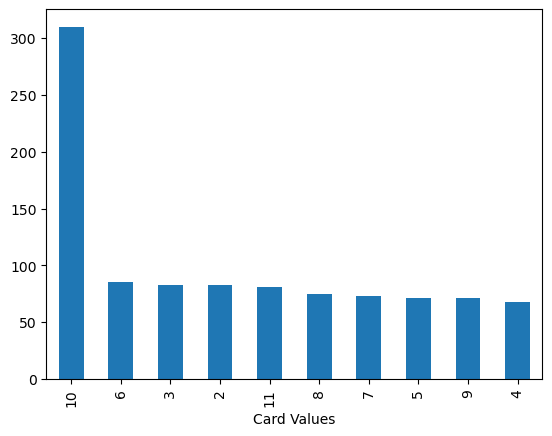

In [3]:
#verify card probabilities are correct

results = pd.DataFrame(test, columns = ["Card Values"])
results["Card Values"].value_counts().plot(kind="bar")

In [ ]:
#ORIGINAL CODE WITHOUT FUNCTIONS
#define input varibles
current_money = 15000
bet = 5
double = 2
blackjack = 1.5

#define initial conditions
hit_count = 0
hit = True #go through while loop at least once
soft = True #go through softtotal while loop at least once if one card is an ace. loop through soft total until staying or going over 21 which exits this loop and goes to 1st loop for hard totals

#define lists to later append data in
money = []
player_total_list = []
dealer_total_list = []
player_1st_list = []
player_2nd_list = []
dealer_1st_list = []
dealer_2nd_list = []
hit_count_list = []
outcome_list = []

###########################################################################################################################################
#define function if decision is hit me. Ace turns to 1 if it's thrid or more card.
def hit_me(current_total, player = "True"): #I use this function to model dealer hand too and I don't want hit_count to go up
    another_card = random.choice(card_options)
    if another_card == 11 and current_total >=11: #ace only worth 1 if total goes over 21 (current total = 11)
        another_card = 1
    else:
        another_card = another_card
    global hit_count #have to define this as global or else these variables or only defined within the function. I want the rest of my code to use it also
    if player == "True":
        hit_count = hit_count + 1
    current_total = current_total + another_card
    return current_total

#define stay function
def stay(current_total):
    global hit
    global soft
    hit = False
    soft = False
    return current_total
    
#can't double down if already taken a card. Can have either (double or hit) or (double or stay). Default is to hit if cannot double
def double_down(hit_count, Ds = "Hit"):
    global current_total
    if hit_count >= 1 and Ds == "Hit": #hit
        current_total = hit_me(current_total)
    elif hit_count >= 1 and Ds == "Stay": #stay
        current_total = stay(current_total)
    else: #double
        global bet
        global hit
        global soft
        global double
        bet = double*bet
        current_total = hit_me(current_total)
        hit = False
        soft = False
    return current_total
 ###########################################################################################################################################

#start for loop to model 100,000 hands of play
for hand in range(100000):

    #deal cards from infinite deck
    first_card = deals = random.choice(card_options)
    second_card = deals = random.choice(card_options)
    dealer_first_card = deals = random.choice(card_options)
    dealer_second_card = deals = random.choice(card_options)
    current_total = (first_card) + (second_card)
    
    hit = True #go through while loop at least once
    soft = True #go through softtotal while loop at least once if one card is an ace. loop through soft total until staying or going over 21 which exits this loop and goes to 1st loop for hard totals
    split_again = True #If dealt pairs, go through split loop at least once



    ###########################################################################################################################################
    #model gampeplay
    ###########################################################################################################################################
    while hit == True:

        #blackjack
        if (first_card + second_card) == 21:
            player_total = 21
            hit = False
        ###########################################################################################################################################
        #if cards are pairs, SPLIT OR NOT
        # elif (first_card) == (second_card) and split_again == True:
        #     if (first_card == 2 or first_card == 3) and dealer_first_card <=7:
        #          split = True
        #     elif (first_card == 2 or first_card == 3) and dealer_first_card > 7:
        #         split = False
        #     elif (first_card == 4) and (dealer_first_card == 5 or dealer_first_card == 6):
        #         split = True
        #     elif (first_card == 4) and (dealer_first_card <= 4 or dealer_first_card >= 7):
        #         split = False
        #     elif first_card == 5 or first_card == 10:
        #         split = False
        #     elif first_card == 6 and dealer_first_card <=6:
        #         split = True
        #     elif first_card == 6 and dealer_first_card >=7:
        #         split = False
        #     elif first_card == 7 and dealer_first_card <=7:
        #         split = True
        #     elif first_card == 7 and dealer_first_card >=8:
        #         split = False
        #     elif first_card == 8 or first_card == 11:
        #         split = True
        #     elif first_card == 9 and (dealer_first_card == 7 or dealer_first_card >=10):
        #         split = False
        #     elif first_card == 9 and (dealer_first_card <=6 or dealer_first_card == 8 or dealer_first_card == 9):
        #         split = True
        #     else:
        #         player_total = 40

        #     #if not splitting, return to hard totals loop
        #     if split == False:
        #         current_total = current_total
        #         split_again = False
        #     #If splitting, model the 2 hands
        #     elif split == True:
        #         current_total = first_card #define current total of now split hand. This is input for hit_me function
        #         hand_1_total = hit_me(current_total)
        #         current_total = first_card #redefine current total for hand 2 so, it doesn't run hit_me function based off current total from hand 1
        #         hand_2_total = hit_me(current_total)

        #         hit_count = 0 #reset hit_count for each hand

        #         if hand_1_total == 2*first_card:
        #             split_again = True
        #         else:
        #             split_again = False

        #         if hand_2_total == 2*first_card:
        #             split_again = True
        #         else:
        #             split_again = False
        #     else:
        #         player_total = 87
        #         hit = False
        ###########################################################################################################################################

        ###########################################################################################################################################
        #if 1 card is an ace     SOFT TOTALS
        elif ((first_card) == 11 or (second_card) == 11) and soft == True:  #need the soft == True clause to avoid exiting softtotal loop, going through hardtotal loop, and coming back into softotal loop

            while soft == True:
                #hit_me = current_total + random.choice(card_options) #this is critial to have inside the while loop. Otherwise it will be the same value (10) and get caught forever in a while loop, adding 10 then subrating it again
                #print(current_total, first_card, second_card)
                #if soft total >= 19, stay
                if (current_total >= 19):
                    player_total = stay(current_total)
                #if soft total = 18 and dealer has <=6, double
                elif (current_total == 18) and dealer_first_card <= 6:
                    player_total = double_down(hit_count, Ds="Stay")
                    #print(current_total, first_card, second_card, dealer_first_card)
                #if soft total = 18 and dealer has 7 or 8, stay
                elif (current_total == 18) and (dealer_first_card == 7 or dealer_first_card == 8):
                    player_total = stay(current_total)
                #if soft total = 18 and dealer has >= 9, hit
                elif (current_total == 18) and (dealer_first_card >= 9):
                    current_total = hit_me(current_total)
                #if soft total = 17 and dealer has 3 - 6, double
                elif (current_total == 17) and (dealer_first_card >= 3 and dealer_first_card <= 6):
                    player_total = double_down(hit_count)
                #if soft total = 17 and dealer has 2 or >=7, hit
                elif (current_total == 17) and (dealer_first_card == 2 or dealer_first_card >= 7):
                    current_total = hit_me(current_total)
                #if soft total = 15-16 and dealer has 4 - 6, double
                elif (current_total == 15 or current_total == 16) and (dealer_first_card >= 4 and dealer_first_card <= 6):
                    player_total = double_down(hit_count)
                #if soft total = 15-16 and dealer has 2 or >= 7, hit
                elif (current_total == 15 or current_total == 16) and (dealer_first_card <= 3 or dealer_first_card >= 7):
                    current_total = hit_me(current_total)
                #if soft total = 13-15 and dealer has 5-6, double
                elif (current_total == 13 or current_total == 14) and (dealer_first_card == 5 or dealer_first_card == 6):
                    player_total = double_down(hit_count)
                #if soft total = 13-15 and dealer has <=4 or >= 7, hit
                elif (current_total == 13 or current_total == 14) and (dealer_first_card <= 4 or dealer_first_card >= 7):
                    current_total = hit_me(current_total)
                else:
                    player_total = 70
                    hit = False
                    soft = False
                #print(current_total)
                #######################
                #exit soft totals loop if gone over 21. Re-enter hardtotals loop
                if current_total > 21:
                    current_total = current_total - 10
                    player_total = current_total   #CRITICAL OR ELSE ON DOUBLE DOWNS, HIT & SOFT = FALSE, EXITING ALL LOOPS SO PLAYER TOTAL STAYS 10 POINTS ABOVE CURRENT TOTAL
                    soft = False
                    #break
                    #hit = False
                    

                #print(current_total, first_card, second_card, dealer_first_card)
        ##########################################################################################################################################

        #if hard total >=17, stay (also bust)
        elif current_total >= 17:
            player_total = stay(current_total)
        #if hard total is 13-16 dealer <= 6, stay
        elif current_total <= 16 and current_total >= 13 and dealer_first_card <= 6:
            player_total = stay(current_total)
        #if hard total is 13-16 dealer > 6, hit
        elif current_total <= 16 and current_total >= 13 and dealer_first_card > 6:
            current_total = hit_me(current_total)
        #if hard total is 12 dealer = 2,3, >= 7, hit
        elif current_total == 12 and (dealer_first_card <= 3 or dealer_first_card >= 7):
            current_total = hit_me(current_total)
        #if hard total is 12 dealer = 4,5,6, stay
        elif current_total == 12 and (dealer_first_card >= 4 and dealer_first_card <= 6):
            player_total = stay(current_total)
        #if hard total = 11, double
        elif current_total == 11:
            player_total = double_down(hit_count)
        #if hard total = 10 & dealer <=9, double
        elif current_total == 10 and dealer_first_card <= 9:
            player_total = double_down(hit_count)
        #if hard total = 10 & dealer >9, hit
        elif current_total == 10 and dealer_first_card > 9:
            current_total = hit_me(current_total)
        #if hard total = 9 & dealer 3-6, double
        elif current_total == 9 and (dealer_first_card >= 3 and dealer_first_card <= 6):
            player_total = double_down(hit_count)
        #if hard total = 9 & dealer =2 or >=7, hit
        elif current_total == 9 and (dealer_first_card == 2 or dealer_first_card >=7):
            current_total = hit_me(current_total)
        #if hard total <=8, hit
        elif current_total <= 8: 
            current_total = hit_me(current_total)
        else:
            player_total = 60
            hit = False

    #model dealer's hand
    dealer_total = dealer_first_card + dealer_second_card
    while dealer_total < 17:
        dealer_total = hit_me(dealer_total, player = "False")

    ###########################################################################################################################################
    #compare player vs dealer's hand
    #player bust
    if player_total > 21:
        current_money = current_money - bet
        outcome = "Bust"
    #blackjack
    elif (first_card + second_card) == 21:
        if (dealer_first_card + dealer_second_card) == 21:
            current_money = current_money
            outcome = "Push"
        else:
            current_money = current_money + blackjack*bet
            outcome = "Blackjack"
    #dealer bust
    elif dealer_total > 21:
        current_money = current_money + bet
        outcome = "Dealer Bust"
    #win
    elif player_total > dealer_total:
        current_money = current_money + bet
        outcome = "Win"
    #loss
    elif player_total < dealer_total:
        current_money = current_money - bet
        outcome = "Loss"
    #push
    elif player_total == dealer_total:
        current_money = current_money
        outcome = "Push"
    else:
        outcome = "Undefined"
    ###########################################################################################################################################

    #append variables to list
    money.append(current_money)
    player_total_list.append(player_total)
    dealer_total_list.append(dealer_total)
    player_1st_list.append(first_card)
    player_2nd_list.append(second_card)
    dealer_1st_list.append(dealer_first_card)
    dealer_2nd_list.append(dealer_second_card)
    hit_count_list.append(hit_count)
    outcome_list.append(outcome)

    #reset variables
    player_total = 0
    dealer_total = 0
    bet = 5
    hit_count = 0
  


In [289]:
#DEFINE ALL FUNCTIONS
def hit_me(current_total, player = "True"): #I use this function to model dealer hand too and I don't want hit_count to go up
    another_card = random.choice(card_options)
    if another_card == 11 and current_total >=11: #ace only worth 1 if total goes over 21 (current total = 11)
        another_card = 1
    else:
        another_card = another_card
    global hit_count #have to define this as global or else these variables or only defined within the function. I want the rest of my code to use it also
    if player == "True":
        hit_count = hit_count + 1
    current_total = current_total + another_card
    return current_total

#define stay function
def stay(current_total):
    global hit
    global soft
    hit = False
    soft = False
    return current_total
    
#can't double down if already taken a card. Can have either (double or hit) or (double or stay). Default is to hit if cannot double
def double_down(current_total, Ds = "Hit"):
    global hit_count
    global bet
    global hit
    global soft
    global double
    if hit_count >= 1 and Ds == "Hit": #hit
        current_total = hit_me(current_total)
    elif hit_count >= 1 and Ds == "Stay": #stay
        current_total = stay(current_total)
    else: #double
        bet = double*bet
        current_total = hit_me(current_total)
        hit = False
        soft = False
    return current_total

#compare player vs dealer's hand
def compare_hands(player_total, dealer_total, first_card, second_card, dealer_first_card, dealer_second_card):
    global current_money
    global bet
    global blackjack

    #player bust
    if player_total > 21:
        current_money = current_money - bet
        outcome = "Bust"
    #blackjack
    elif (first_card + second_card) == 21:
        if (dealer_first_card + dealer_second_card) == 21:
            current_money = current_money
            outcome = "Push"
        else:
            current_money = current_money + blackjack*bet
            outcome = "Blackjack"
    #dealer bust
    elif dealer_total > 21:
        current_money = current_money + bet
        outcome = "Dealer Bust"
    #win
    elif player_total > dealer_total:
        current_money = current_money + bet
        outcome = "Win"
    #loss
    elif player_total < dealer_total:
        current_money = current_money - bet
        outcome = "Loss"
    #push
    elif player_total == dealer_total:
        current_money = current_money
        outcome = "Push"
    else:
        outcome = "Undefined"

    return [current_money, outcome]


    
def soft_totals(current_total, dealer_first_card):
    global hit
    global soft
    global hit_count
    while soft == True:                
        #if soft total >= 19, stay
        if (current_total >= 19):
            current_total = stay(current_total)
        #if soft total = 18 and dealer has <=6, double
        elif (current_total == 18) and dealer_first_card <= 6:
            current_total = double_down(current_total, Ds="Stay")
            #print(current_total, first_card, second_card, dealer_first_card)
        #if soft total = 18 and dealer has 7 or 8, stay
        elif (current_total == 18) and (dealer_first_card == 7 or dealer_first_card == 8):
            current_total = stay(current_total)
        #if soft total = 18 and dealer has >= 9, hit
        elif (current_total == 18) and (dealer_first_card >= 9):
            current_total = hit_me(current_total)
        #if soft total = 17 and dealer has 3 - 6, double
        elif (current_total == 17) and (dealer_first_card >= 3 and dealer_first_card <= 6):
            current_total = double_down(current_total)
        #if soft total = 17 and dealer has 2 or >=7, hit
        elif (current_total == 17) and (dealer_first_card == 2 or dealer_first_card >= 7):
            current_total = hit_me(current_total)
        #if soft total = 15-16 and dealer has 4 - 6, double
        elif (current_total == 15 or current_total == 16) and (dealer_first_card >= 4 and dealer_first_card <= 6):
            current_total = double_down(current_total)
        #if soft total = 15-16 and dealer has 2 or >= 7, hit
        elif (current_total == 15 or current_total == 16) and (dealer_first_card <= 3 or dealer_first_card >= 7):
            current_total = hit_me(current_total)
        #if soft total = 13-15 and dealer has 5-6, double
        elif (current_total == 13 or current_total == 14) and (dealer_first_card == 5 or dealer_first_card == 6):
            current_total = double_down(current_total)
        #if soft total = 13-15 and dealer has <=4 or >= 7, hit
        elif (current_total == 13 or current_total == 14) and (dealer_first_card <= 4 or dealer_first_card >= 7):
            current_total = hit_me(current_total)
        else:
            player_total = 70
            hit = False
            soft = False
    
        #######################
        #exit soft totals loop if gone over 21. Re-enter hardtotals loop
        if current_total > 21:
            current_total = current_total - 10
            soft = False
            #break
            #hit = False

    else: #need the else statement (in line with while loop because player_total is a function output and may not be defined in the if/elif statments, meaning the function can't return (for example when hitting) anything for this variable
        player_total = current_total #player total can equal current total with no harm done up until comparing to dealer's hand. By then all possible hands would have defined player_total as final value (written explicitly after stay and double function)
    return [player_total, current_total] #need to return player_total & current total because some hands continue after this loop and some stop, so both are important

def hard_totals(current_total, dealer_first_card):
    global soft #don't need soft here
    global hit
    global hit_count
    #global player_total
    while hit == True:
        #if hard total >=17, stay (also bust)
        if current_total >= 17:
            current_total = stay(current_total)
        #if hard total is 13-16 dealer <= 6, stay
        elif current_total <= 16 and current_total >= 13 and dealer_first_card <= 6:
            current_total = stay(current_total)
        #if hard total is 13-16 dealer > 6, hit
        elif current_total <= 16 and current_total >= 13 and dealer_first_card > 6:
            current_total = hit_me(current_total)
        #if hard total is 12 dealer = 2,3, >= 7, hit
        elif current_total == 12 and (dealer_first_card <= 3 or dealer_first_card >= 7):
            current_total = hit_me(current_total)
        #if hard total is 12 dealer = 4,5,6, stay
        elif current_total == 12 and (dealer_first_card >= 4 and dealer_first_card <= 6):
            current_total = stay(current_total)
        #if hard total = 11, doublz
        elif current_total == 11:
            current_total = double_down(current_total)
        #if hard total = 10 & dealer <=9, double
        elif current_total == 10 and dealer_first_card <= 9:
            current_total = double_down(current_total)
        #if hard total = 10 & dealer >9, hit
        elif current_total == 10 and dealer_first_card > 9:
            current_total = hit_me(current_total)
        #if hard total = 9 & dealer 3-6, double
        elif current_total == 9 and (dealer_first_card >= 3 and dealer_first_card <= 6):
            current_total= double_down(current_total)
        #if hard total = 9 & dealer =2 or >=7, hit
        elif current_total == 9 and (dealer_first_card == 2 or dealer_first_card >=7):
            current_total = hit_me(current_total)
        #if hard total <=8, hit
        elif current_total <= 8: 
            current_total = hit_me(current_total)
        else:
            player_total = 60
            hit = False
    else: #need the else statement (in line with while loop because player_total is a function output and may not be defined in the if/elif statments, meaning the function can't return (for example when hitting) anything for this variable
          player_total = current_total #player total can equal current total with no harm done up until comparing to dealer's hand. By then all possible hands would have defined player_total as final value (written explicitly after stay and double function)
    return player_total

In [305]:
#BLACKJACK MODELING WITH FUNCTIONS
#define input varibles
current_money = 15000
bet = 5
double = 2 #when doubling down
blackjack = 1.5

#define initial conditions
hit_count = 0
hit = True #go through while loop at least once
soft = True #go through softtotal while loop at least once if one card is an ace. loop through soft total until staying or going over 21 which exits this loop and goes to 1st loop for hard totals

#define lists to later append data in
money = []
player_total_list = []
dealer_total_list = []
player_1st_list = []
player_2nd_list = []
dealer_1st_list = []
dealer_2nd_list = []
hit_count_list = []
outcome_list = []



def splits(current_total, first_card, dealer_first_card):
    global split
    #define when to split and not
    if (first_card == 2 or first_card == 3) and dealer_first_card <=7:
        split = True
    elif (first_card == 2 or first_card == 3) and dealer_first_card > 7:
        split = False
    elif (first_card == 4) and (dealer_first_card == 5 or dealer_first_card == 6):
        split = True
    elif (first_card == 4) and (dealer_first_card <= 4 or dealer_first_card >= 7):
        split = False
    elif first_card == 5 or first_card == 10:
        split = False
    elif first_card == 6 and dealer_first_card <=6:
        split = True
    elif first_card == 6 and dealer_first_card >=7:
        split = False
    elif first_card == 7 and dealer_first_card <=7:
        split = True
    elif first_card == 7 and dealer_first_card >=8:
        split = False
    elif first_card == 8 or first_card == 11:
        split = True
    elif first_card == 9 and (dealer_first_card == 7 or dealer_first_card >=10):
        split = False
    elif first_card == 9 and (dealer_first_card <=6 or dealer_first_card == 8 or dealer_first_card == 9):
        split = True
    else:
        split = False
        current_total = 40
        player_total = 40

    #if not splitting, return to hard totals loop
    if split == False:
        player_total = hard_totals(current_total, dealer_first_card)
        
        
    #If splitting, model the 2 hands seperatly
    elif split == True:
        player_total = 50
        player_total_split_list =[] #list to append totals to
        n_hands = ["hand 1", "hand 2"]

        if random.choice(card_options) == 2*first_card:  #model 3rd split  by adding item to n_hands list. Has to be before for loop, so this just models whether a 3rd card will be the same as current
                n_hands.append("hand 3")
                if random.choice(card_options) == 2*first_card:  #model 4th card
                    n_hands.append("hand 4")

        for hand in range(len(n_hands)):  #loop though and model each split hand a # of times equal to the length of n_hands list

            hand_total[hand] = hit_me(first_card) #first card is current total. This gives the hand 2 cards 
            hit_count = 0 #reset hit_count for each hand

            #if getting blackjack after splitting
            if (hand_total[hand] - first_card) == 10 and first_card == 11:
                global blackjack
                global bet
                hand_total = 21
                bet = blackjack*bet

            #IF 2ND CARD IS AN ACE, RUN SOFTOTALS->HARDTOTALS, IF NOT AN ACE RUN HARDTOTALS
            if (hand_total[hand] - first_card) == 11:  
                soft_function = soft_totals(hand_total[hand], dealer_first_card)
                hand_total[hand] = soft_function[0] #redefine function outputs because they're a list and global variables doens't work here
                hand_total[hand] = soft_function[1] #same as above

                if hit != False:  #only run hardtotals function if you didn't stay or double in soft total loop (you hit and went over 21)
                    hand_total[hand] = hard_totals(hand_totalhand, dealer_first_card)

            else:
                hand_totalhand = hard_totals(hand_total[hand], dealer_first_card)


            player_total_split_list.append(hand_total[hand]) #append the split hand to this list
            

    else:
        current_total = 87
        player_total = 87

    return [player_total, player_total_split_list]
 ###########################################################################################################################################

#start for loop to model 100,000 hands of play
for hand in range(1000000):

    #deal cards from infinite deck
    first_card = deals = random.choice(card_options)
    second_card = deals = random.choice(card_options)
    dealer_first_card = deals = random.choice(card_options)
    dealer_second_card = deals = random.choice(card_options)
    current_total = (first_card) + (second_card)
    
    hit = True #go through while loop at least once
    soft = True #go through softtotal while loop at least once if one card is an ace. loop through soft total until staying or going over 21 which exits this loop and goes to 1st loop for hard totals
    split = False #don't compare player's & dealer's hand unless cards were split



    ###########################################################################################################################################
    #model gampeplay
    ###########################################################################################################################################

    #blackjack
    if (first_card + second_card) == 21:
        player_total = 21
        hit = False
    ###########################################################################################################################################
    #if cards are pairs, SPLIT OR NOT
    # elif (first_card) == (second_card):
    #     split_cards = splits(current_total, first_card, dealer_first_card)
    #     player_total = split_cards[0]
    #     player_total_split_list = split_cards[1]
    ###########################################################################################################################################

    ###########################################################################################################################################
    #SOFT TOTALS  -- if 1 card is an ace     
    elif (first_card) == 11 or (second_card) == 11:  #need the soft == True clause to avoid exiting softtotal loop, going through hardtotal loop, and coming back into softotal loop
        
        #run soft_totals function
        soft_function = soft_totals(current_total, dealer_first_card)

        #redefine function outputs because they're a list and global variables doens't work here
        player_total = soft_function[0]
        current_total = soft_function[1]

        #only run hardtotals function if you didn't stay or double in soft total loop (you hit and went over 21)
        if hit != False:  
            player_total = hard_totals(current_total, dealer_first_card)
    #########################################################################################################################################
    else:
        player_total = hard_totals(current_total, dealer_first_card)

    #model dealer's hand
    dealer_total = dealer_first_card + dealer_second_card
    while dealer_total < 17:
        dealer_total = hit_me(dealer_total, player = "False")



    if split == True: #only run this if cards were split, have to be modeled as seperate hands
        for i in player_total_split_list:
            hand_results = compare_hands(player_total_split_list[i], dealer_total, first_card, second_card, dealer_first_card, dealer_second_card)
            current_money = hand_results[0]
            outcome = hand_results[1]

            #append variables to list
            money.append(current_money)
            player_total_list.append(player_total)
            dealer_total_list.append(dealer_total)
            player_1st_list.append(first_card)
            player_2nd_list.append(second_card)
            dealer_1st_list.append(dealer_first_card)
            dealer_2nd_list.append(dealer_second_card)
            hit_count_list.append(hit_count)
            outcome_list.append(outcome)

    else: #if no split occurred
            hand_results = compare_hands(player_total, dealer_total, first_card, second_card, dealer_first_card, dealer_second_card)
            current_money = hand_results[0]
            outcome = hand_results[1]

            #append variables to list
            money.append(current_money)
            player_total_list.append(player_total)
            dealer_total_list.append(dealer_total)
            player_1st_list.append(first_card)
            player_2nd_list.append(second_card)
            dealer_1st_list.append(dealer_first_card)
            dealer_2nd_list.append(dealer_second_card)
            hit_count_list.append(hit_count)
            outcome_list.append(outcome)

    #reset variables
    player_total = 0
    dealer_total = 0
    bet = 5
    hit_count = 0
  


In [306]:
df = pd.DataFrame({"Current Money":money,
                   "Player Totals": player_total_list,
                   "Dealer Totals": dealer_total_list,
                   "Player 1st Card": player_1st_list,
                   "Player 2nd Card": player_2nd_list,
                   "Dealer 1st Card": dealer_1st_list,
                   "Dealer 2nd Card": dealer_2nd_list,
                   "Hit Count": hit_count_list,
                   "Outcome": outcome_list})
df["Hit Count"].value_counts()

Hit Count
0    467608
1    396920
2    111319
3     21380
4      2550
5       210
6        13
Name: count, dtype: int64

In [307]:
df.loc[(df["Player Totals"] == 12)].head(10)

,Current Money,Player Totals,Dealer Totals,Player 1st Card,Player 2nd Card,Dealer 1st Card,Dealer 2nd Card,Hit Count,Outcome
17,15007.5,12,17,3,8,8,5,1,Loss
19,15022.5,12,26,4,7,7,9,1,Dealer Bust
58,14982.5,12,18,3,7,8,10,1,Loss
71,14982.5,12,20,5,2,6,3,1,Loss
72,14977.5,12,18,8,4,5,7,0,Loss
130,14952.5,12,18,3,9,5,10,0,Loss
161,15015.0,12,23,11,11,3,10,0,Dealer Bust
189,15030.0,12,18,4,8,5,2,0,Loss
203,15070.0,12,19,10,2,5,4,0,Loss
225,15055.0,12,20,11,11,10,10,0,Loss


In [308]:
df["Player Totals"].value_counts() # 10 and 11 can still come up if doubling on 9 or 10 and you get a 2

Player Totals
20    163886
17    117824
19    116994
18    113500
21    103579
22     48244
13     46051
14     44411
15     42521
16     40758
23     38796
12     36444
24     33732
25     28936
26     23446
11       878
Name: count, dtype: int64

In [313]:
#Avg Casino edge (loss/hand)
(df["Current Money"][999999] - df["Current Money"][0])/10000/5

0.4742

Text(0, 0.5, 'Money')

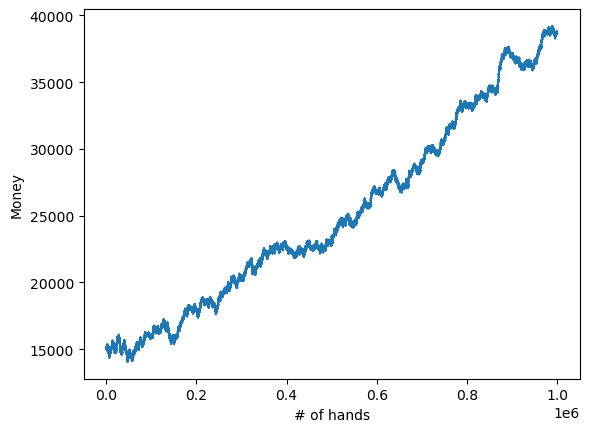

In [314]:
mychart = df["Current Money"].plot(kind='line')
mychart.set_xlabel("# of hands")
mychart.set_ylabel("Money")